In [78]:
import pandas as pd 
data = pd.read_csv("sample_dpp_twofake.csv") 
data.loc[(data.agent == 'agent_drl_honest'),'agent']='Truthful'
data.loc[(data.agent == 'agent_drl_mid'),'agent']='Indiff'
data.loc[(data.agent == 'agent_drl_mid_optimised'),'agent']='Indiff-pruned'
data.loc[(data.agent == 'agent_drl_policy'),'agent']='Policy'
data.loc[(data.agent == 'agent_drl_org'),'agent']='Ambiguity'
data.loc[(data.agent == 'agent_ds4'),'agent']='πd4'

In [42]:
data.head()

,map,agent,start,optcost,density,distribution,formula,goal0,costdif,cost,...,cost.3,probability.3,goal4,costdif.4,cost.4,probability.4,goal5,costdif.5,cost.5,probability.5
0,arena2,Truthful,"(20, 41)",44.28,10,P,3,"(40, 5)",797.172,44.28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,arena2,Truthful,"(20, 41)",44.28,20,P,3,"(40, 5)",792.344,44.28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,arena2,Truthful,"(20, 41)",44.28,30,P,3,"(40, 5)",786.688,44.28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,arena2,Truthful,"(20, 41)",44.28,40,P,3,"(40, 5)",782.446,44.28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,arena2,Truthful,"(20, 41)",44.28,50,P,3,"(40, 5)",777.618,44.28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
avgdata = data.groupby(['agent', 'density'], as_index=False).mean()
avgdata = avgdata[avgdata['density']!=100] #exclude 

In [80]:
avgdata.head()

,agent,density,optcost,formula,costdif,cost,probability,costdif.1,cost.1,probability.1,...,goal3,costdif.3,cost.3,probability.3,goal4,costdif.4,cost.4,probability.4,goal5,costdif.5
0,Ambiguity,10,40.379353,3,796.865882,51.745765,0.340882,797.282882,51.745765,0.327353,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ambiguity,20,40.379353,3,792.600824,51.745765,0.354706,793.954118,51.745765,0.312353,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ambiguity,30,40.379353,3,788.707059,51.745765,0.386471,792.174235,51.745765,0.285000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ambiguity,40,40.379353,3,784.338765,51.745765,0.430000,791.095176,51.745765,0.247647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ambiguity,50,40.379353,3,780.247353,51.745765,0.467647,790.586000,51.745765,0.216471,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
plotdata = avgdata[['agent', 'density', 'probability','cost']]
plotdata.head()

,agent,density,probability,cost
0,Ambiguity,10,0.340882,51.745765
1,Ambiguity,20,0.354706,51.745765
2,Ambiguity,30,0.386471,51.745765
3,Ambiguity,40,0.430000,51.745765
4,Ambiguity,50,0.467647,51.745765


In [82]:
boxplot = plotdata.boxplot()
boxplot.set_ylabel("Proportoin to the Optimal Path")

Text(0, 0.5, 'Proportoin to the Optimal Path')

In [83]:
import matplotlib.pyplot as plt
import numpy as np

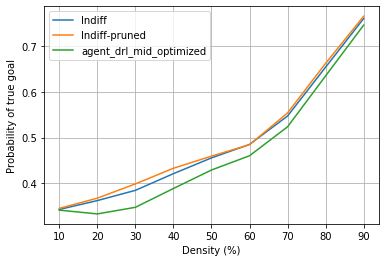

In [91]:
x = np.arange(10, 100, 10)
#print(x)
for agent in plotdata['agent'].unique():
    if agent in ["agent_drl_mid_optimized","Indiff","Indiff-pruned"]:
        y = np.asarray(plotdata[plotdata['agent']==agent]['probability'])
        plt.plot(x, y, label=agent)
    
plt.legend()
plt.xlabel('Density (%)')
plt.ylabel('Probability of true goal')

plt.grid(True)
plt.savefig('prob_per_density.jpg')
plt.show()

In [92]:
costdata = plotdata[plotdata['density']==10][['agent','cost']]
costdata = costdata.sort_values(by=['cost'])

In [93]:
y = np.asarray(costdata['cost'])
n = (costdata[costdata['agent']=='Truthful']['cost']).iat[0]
y = np.true_divide(y, n)
print(y)

[1.         1.11493643 1.13975401 1.14617838 1.16605458 1.28149069
 1.37917748]


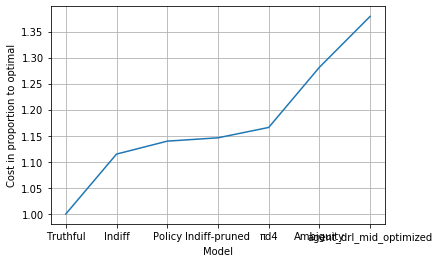

In [94]:
x = np.asarray(costdata['agent'])
y = np.asarray(costdata['cost'])
oc = (costdata[costdata['agent']=='Truthful']['cost']).iat[0]
y = np.true_divide(y, oc)
plt.plot(x, y, label=agent)
    
#plt.legend()
plt.xlabel('Model')
plt.ylabel('Cost in proportion to optimal')

plt.grid(True)
plt.savefig('cost_proportion.jpg')
plt.show()

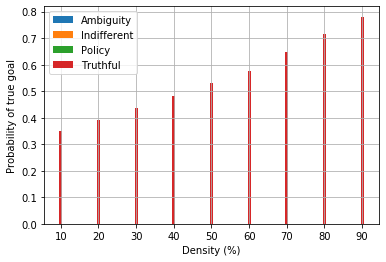

In [14]:
for agent in plotdata['agent'].unique():
    y = np.asarray(plotdata[plotdata['agent']==agent]['probability'])
    plt.bar(x, y, label=agent)
    
plt.legend()
plt.xlabel('Density (%)')
plt.ylabel('Probability of true goal')

plt.grid(True)
plt.show()